In [ ]:
#Importing packages

from matplotlib import dates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [ ]:
#Download Apple and SNP data from yfinance, assign to variable 'raw'

raw = yf.download('SPY AAPL', start = '2010-01-01', end = '2022-12-31')

[*********************100%%**********************]  2 of 2 completed



In [ ]:
#Display data frame to get a general idea of dataset

raw

Price        Adj Close                   Close                    High  \
Ticker            AAPL         SPY        AAPL         SPY        AAPL   
Date                                                                     
2010-01-04    6.454505   86.580750    7.643214  113.330002    7.660714   
2010-01-05    6.465664   86.809937    7.656429  113.629997    7.699643   
2010-01-06    6.362820   86.871040    7.534643  113.709999    7.686786   
2010-01-07    6.351056   87.237778    7.520714  114.190002    7.571429   
2010-01-08    6.393280   87.528061    7.570714  114.570000    7.571429   
...                ...         ...         ...         ...         ...   
2022-12-23  130.631348  374.799988  131.860001  382.910004  132.419998   
2022-12-27  128.818405  373.321991  130.029999  381.399994  131.410004   
2022-12-28  124.865593  368.682373  126.040001  376.660004  131.029999   
2022-12-29  128.402328  375.318756  129.610001  383.440002  130.479996   
2022-12-30  128.719345  374.330109  129.929993  382.429993  129.949997   

Price                          Low                    Open              \
Ticker             SPY        AAPL         SPY        AAPL         SPY   
Date                                                                     
2010-01-04  113.389999    7.585000  111.510002    7.622500  112.370003   
2010-01-05  113.680000    7.616071  112.849998    7.664286  113.260002   
2010-01-06  113.989998    7.526786  113.430000    7.656429  113.519997   
2010-01-07  114.330002    7.466071  113.180000    7.562500  113.500000   
2010-01-08  114.620003    7.466429  113.660004    7.510714  113.889999   
...                ...         ...         ...         ...         ...   
2022-12-23  383.059998  129.639999  378.029999  130.919998  379.649994   
2022-12-27  383.149994  128.720001  379.649994  131.380005  382.790009   
2022-12-28  383.390015  125.870003  376.420013  129.669998  381.329987   
2022-12-29  384.350006  127.730003  379.079987  127.989998  379.630005   
2022-12-30  382.579987  127.430000  378.429993  128.410004  380.640015   

Price          Volume             
Ticker           AAPL        SPY  
Date                              
2010-01-04  493729600  118944600  
2010-01-05  601904800  111579900  
2010-01-06  552160000  116074400  
2010-01-07  477131200  131091100  
2010-01-08  447610800  126402800  
...               ...        ...  
2022-12-23   63814900   59857300  
2022-12-27   69007800   51638200  
2022-12-28   85438400   70911500  
2022-12-29   75703700   66970900  
2022-12-30   77034200   84022200  

[3272 rows x 12 columns]

Price        Adj Close                   Close                    High  \
Ticker            AAPL         SPY        AAPL         SPY        AAPL   
Date                                                                     
2010-01-04    6.454505   86.580750    7.643214  113.330002    7.660714   
2010-01-05    6.465664   86.809937    7.656429  113.629997    7.699643   
2010-01-06    6.362820   86.871040    7.534643  113.709999    7.686786   
2010-01-07    6.351056   87.237778    7.520714  114.190002    7.571429   
2010-01-08    6.393280   87.528061    7.570714  114.570000    7.571429   
...                ...         ...         ...         ...         ...   
2022-12-23  130.631348  374.799988  131.860001  382.910004  132.419998   
2022-12-27  128.818405  373.321991  130.029999  381.399994  131.410004   
2022-12-28  124.865593  368.682373  126.040001  376.660004  131.029999   
2022-12-29  128.402328  375.318756  129.610001  383.440002  130.479996   
2022-12-30  128.719345  374.330109  129.929993  382.429993  129.949997   

Price                          Low                    Open              \
Ticker             SPY        AAPL         SPY        AAPL         SPY   
Date                                                                     
2010-01-04  113.389999    7.585000  111.510002    7.622500  112.370003   
2010-01-05  113.680000    7.616071  112.849998    7.664286  113.260002   
2010-01-06  113.989998    7.526786  113.430000    7.656429  113.519997   
2010-01-07  114.330002    7.466071  113.180000    7.562500  113.500000   
2010-01-08  114.620003    7.466429  113.660004    7.510714  113.889999   
...                ...         ...         ...         ...         ...   
2022-12-23  383.059998  129.639999  378.029999  130.919998  379.649994   
2022-12-27  383.149994  128.720001  379.649994  131.380005  382.790009   
2022-12-28  383.390015  125.870003  376.420013  129.669998  381.329987   
2022-12-29  384.350006  127.730003  379.079987  127.989998  379.630005   
2022-12-30  382.579987  127.430000  378.429993  128.410004  380.640015   

Price          Volume             
Ticker           AAPL        SPY  
Date                              
2010-01-04  493729600  118944600  
2010-01-05  601904800  111579900  
2010-01-06  552160000  116074400  
2010-01-07  477131200  131091100  
2010-01-08  447610800  126402800  
...               ...        ...  
2022-12-23   63814900   59857300  
2022-12-27   69007800   51638200  
2022-12-28   85438400   70911500  
2022-12-29   75703700   66970900  
2022-12-30   77034200   84022200  

[3272 rows x 12 columns]

In [ ]:
#We want to simplify the dataframe suhc that only the Apple stock is shown without nested column headers
#Display just the column header data
    
raw.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',  'SPY'),
            (    'Close', 'AAPL'),
            (    'Close',  'SPY'),
            (     'High', 'AAPL'),
            (     'High',  'SPY'),
            (      'Low', 'AAPL'),
            (      'Low',  'SPY'),
            (     'Open', 'AAPL'),
            (     'Open',  'SPY'),
            (   'Volume', 'AAPL'),
            (   'Volume',  'SPY')],
           names=['Price', 'Ticker'])

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',  'SPY'),
            (    'Close', 'AAPL'),
            (    'Close',  'SPY'),
            (     'High', 'AAPL'),
            (     'High',  'SPY'),
            (      'Low', 'AAPL'),
            (      'Low',  'SPY'),
            (     'Open', 'AAPL'),
            (     'Open',  'SPY'),
            (   'Volume', 'AAPL'),
            (   'Volume',  'SPY')],
           names=['Price', 'Ticker'])

In [ ]:
#Write a function that takes just the price headers, e.g. the 0th position of the column object
# .iloc used to select rows and columns based on index, this line uses selects every second column starting at the first index, isolating Apple
# .pipe allows us to insert a function as a command into a sequence of other function for brevity 

def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]
    df.columns = outer
    return df

aapl = (raw
    .iloc[:, ::2]
    .pipe(fix_cols)
)

aapl

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.454505,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.465664,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.362820,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.351056,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.393280,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2022-12-23,130.631348,131.860001,132.419998,129.639999,130.919998,63814900
2022-12-27,128.818405,130.029999,131.410004,128.720001,131.380005,69007800
2022-12-28,124.865593,126.040001,131.029999,125.870003,129.669998,85438400


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.454505,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.465664,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.362820,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.351056,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.393280,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2022-12-23,130.631348,131.860001,132.419998,129.639999,130.919998,63814900
2022-12-27,128.818405,130.029999,131.410004,128.720001,131.380005,69007800
2022-12-28,124.865593,126.040001,131.029999,125.870003,129.669998,85438400


<AxesSubplot:xlabel='Date'>

<AxesSubplot:xlabel='Date'>

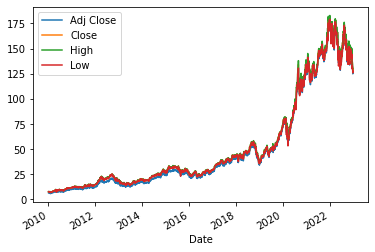

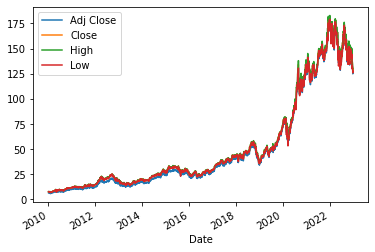

In [ ]:
#Plot the key data in a line graph (exclude Volume and Open price)

(aapl
 .iloc[:, 0:-2:]
.plot()
)

<AxesSubplot:xlabel='Date'>

<AxesSubplot:xlabel='Date'>

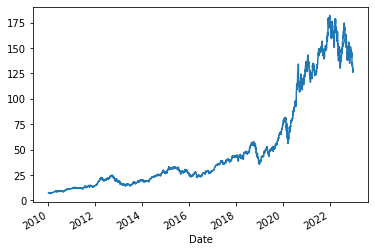

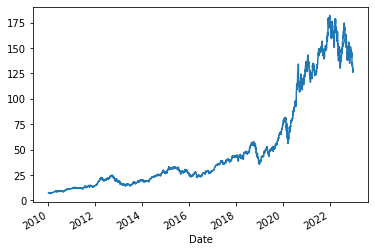

In [ ]:
#Now just the Close price

(aapl
.Close
.plot()
)

<AxesSubplot:xlabel='Date'>

<AxesSubplot:xlabel='Date'>

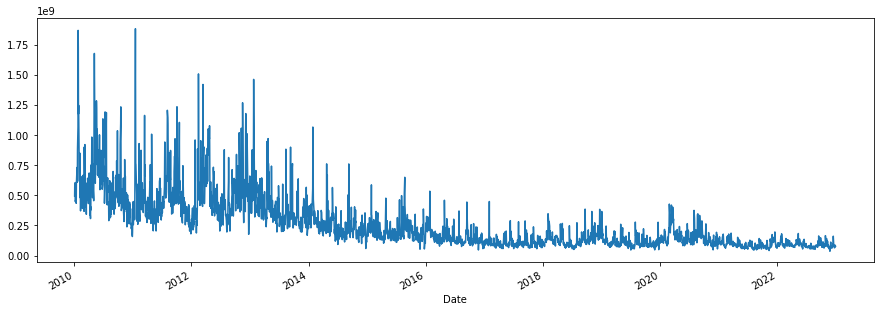

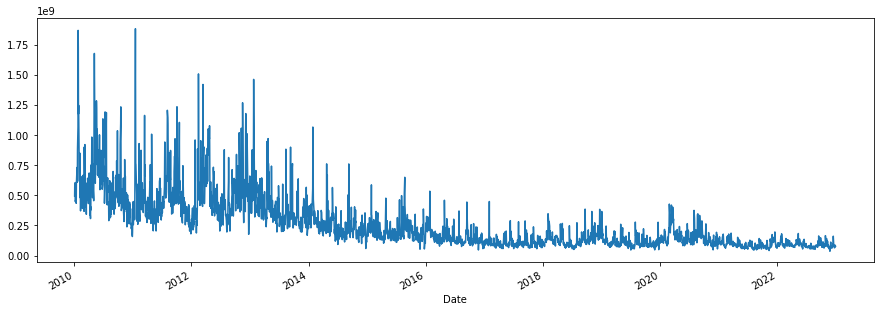

In [ ]:
#Volume plot with customised dimensions

(aapl
.Volume
.plot(figsize = (15,5))
)

<AxesSubplot:xlabel='Date'>

<AxesSubplot:xlabel='Date'>

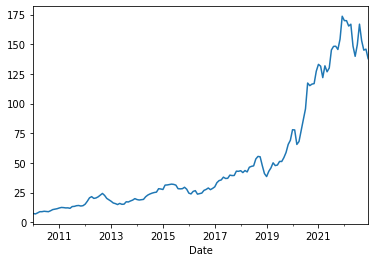

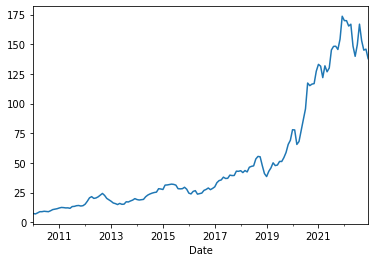

In [ ]:
#Data is resampled to be the mean monthly price, aggregation fucntion is specified with .mean()

(aapl
 .resample('M')
 .Close
 .mean()
 .plot()
)

,Open,High,Low,Close
Date,,,,
2010-01-31,7.622500,7.699643,6.794643,6.859286
2010-02-28,6.870357,7.327500,6.816071,7.307857
2010-03-31,7.348214,8.481429,7.337500,8.392857
2010-04-30,8.478929,9.730714,8.312500,9.324643
2010-05-31,9.422857,9.567143,7.116071,9.174286
2010-06-30,9.274643,9.964643,8.650000,8.983214
2010-07-31,9.082143,9.499643,8.557143,9.187500
2010-08-31,9.301429,9.438571,8.412857,8.682143
2010-09-30,8.838214,10.526071,8.795714,10.133929


,Open,High,Low,Close
Date,,,,
2010-01-31,7.622500,7.699643,6.794643,6.859286
2010-02-28,6.870357,7.327500,6.816071,7.307857
2010-03-31,7.348214,8.481429,7.337500,8.392857
2010-04-30,8.478929,9.730714,8.312500,9.324643
2010-05-31,9.422857,9.567143,7.116071,9.174286
2010-06-30,9.274643,9.964643,8.650000,8.983214
2010-07-31,9.082143,9.499643,8.557143,9.187500
2010-08-31,9.301429,9.438571,8.412857,8.682143
2010-09-30,8.838214,10.526071,8.795714,10.133929


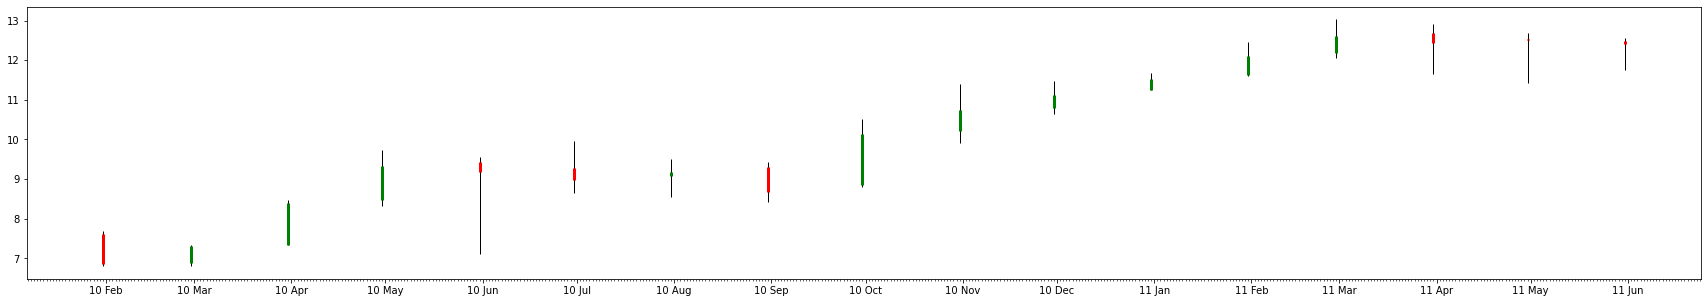

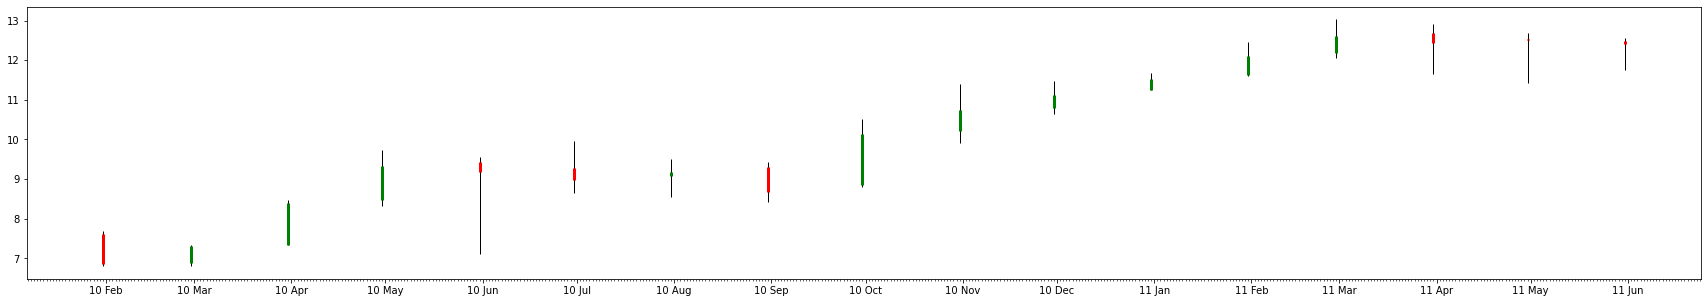

In [ ]:
#Write a function to make a candlestick plot, inputs are the df and axes object
#.vlines is vertical, x location is the index of the variable, the top and bottom of the candlestick are the high and low values for that month in black
#if the opne value is bigger than close, vertical lines will be plotted in red 
#In green if they have gone up (limits are dictated by opne and close , not high and low
#Format x axis labels
#Aggregate each column in a different way, pandas needs to know how to choose whihc value in the month to use

fig, ax = plt.subplots(figsize=(30, 5))
def plot_candle(df, ax):
    
    ax.vlines(x=df.index, ymin=df.Low, ymax=df.High, colors='k', linewidth=1)
    
    red = df.query('Open > Close')
    ax.vlines(x=red.index, ymin=red.Close, ymax=red.Open, colors='r', linewidth=3)
    
    green=df.query('Open <= Close')
    ax.vlines(x=green.index, ymin=green.Close, ymax=green.Open, colors='g', linewidth=3)
    
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%y %b'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return df

(aapl
.resample('M')
.agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last'})
.loc['Jan 2010':'May 2011']
.pipe(plot_candle, ax)
 )

,Open,High,Low,Close
Date,,,,
2019-09-01,NaN,NaN,NaN,NaN
2019-09-02,NaN,NaN,NaN,NaN
2019-09-03,51.607498,51.744999,51.055000,51.424999
2019-09-04,52.097500,52.369999,51.830002,52.297501
2019-09-05,53.000000,53.492500,52.877499,53.320000
...,...,...,...,...
2019-12-27,72.779999,73.492500,72.029999,72.449997
2019-12-28,NaN,NaN,NaN,NaN
2019-12-29,NaN,NaN,NaN,NaN


,Open,High,Low,Close
Date,,,,
2019-09-01,NaN,NaN,NaN,NaN
2019-09-02,NaN,NaN,NaN,NaN
2019-09-03,51.607498,51.744999,51.055000,51.424999
2019-09-04,52.097500,52.369999,51.830002,52.297501
2019-09-05,53.000000,53.492500,52.877499,53.320000
...,...,...,...,...
2019-12-27,72.779999,73.492500,72.029999,72.449997
2019-12-28,NaN,NaN,NaN,NaN
2019-12-29,NaN,NaN,NaN,NaN


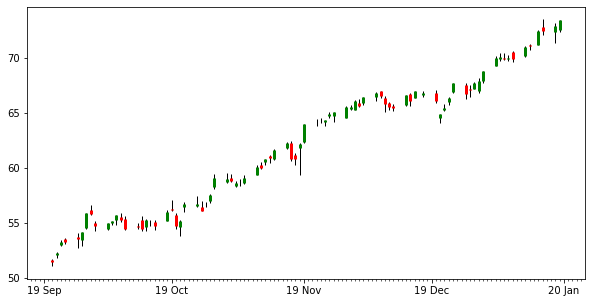

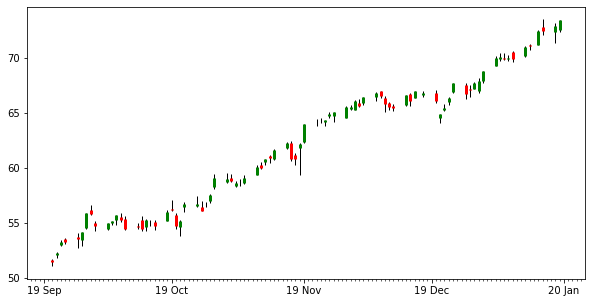

In [ ]:
#Resample by day and take the average daily value between Sep and Dec

fig, ax = plt.subplots(figsize=(10, 5))

(aapl
.resample('d')
.agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last'})
.loc['Sep 2019':'Dec 2019']
.pipe(plot_candle, ax)
 )

In [ ]:
#Want to work with just 2009 to 2019

aapl = (aapl
        .loc['2009':'2019'])

aapl

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.454505,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.465664,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.362820,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.351056,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.393280,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2019-12-24,68.974495,71.067497,71.222504,70.730003,71.172501,48478800
2019-12-26,70.342987,72.477501,72.495003,71.175003,71.205002,93121200
2019-12-27,70.316277,72.449997,73.492500,72.029999,72.779999,146266000


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.454505,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.465664,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.362820,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.351056,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.393280,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2019-12-24,68.974495,71.067497,71.222504,70.730003,71.172501,48478800
2019-12-26,70.342987,72.477501,72.495003,71.175003,71.205002,93121200
2019-12-27,70.316277,72.449997,73.492500,72.029999,72.779999,146266000


In [ ]:
aapl.pct_change()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,0.001729,0.005082,0.004096,0.005482,0.219098
2010-01-06,-0.015906,-0.015906,-0.001670,-0.011723,-0.001025,-0.082646
2010-01-07,-0.001849,-0.001849,-0.015007,-0.008066,-0.012268,-0.135882
2010-01-08,0.006648,0.006648,0.000000,0.000048,-0.006848,-0.061871
...,...,...,...,...,...,...
2019-12-24,0.000951,0.000951,0.002252,0.009095,0.014829,-0.508189
2019-12-26,0.019841,0.019840,0.017867,0.006292,0.000457,0.920864
2019-12-27,-0.000380,-0.000379,0.013760,0.012013,0.022119,0.570706


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,0.001729,0.005082,0.004096,0.005482,0.219098
2010-01-06,-0.015906,-0.015906,-0.001670,-0.011723,-0.001025,-0.082646
2010-01-07,-0.001849,-0.001849,-0.015007,-0.008066,-0.012268,-0.135882
2010-01-08,0.006648,0.006648,0.000000,0.000048,-0.006848,-0.061871
...,...,...,...,...,...,...
2019-12-24,0.000951,0.000951,0.002252,0.009095,0.014829,-0.508189
2019-12-26,0.019841,0.019840,0.017867,0.006292,0.000457,0.920864
2019-12-27,-0.000380,-0.000379,0.013760,0.012013,0.022119,0.570706


<AxesSubplot:xlabel='Date'>

<AxesSubplot:xlabel='Date'>

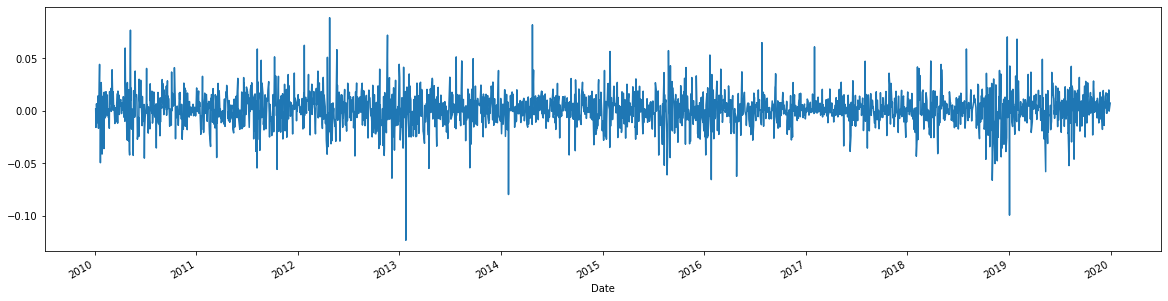

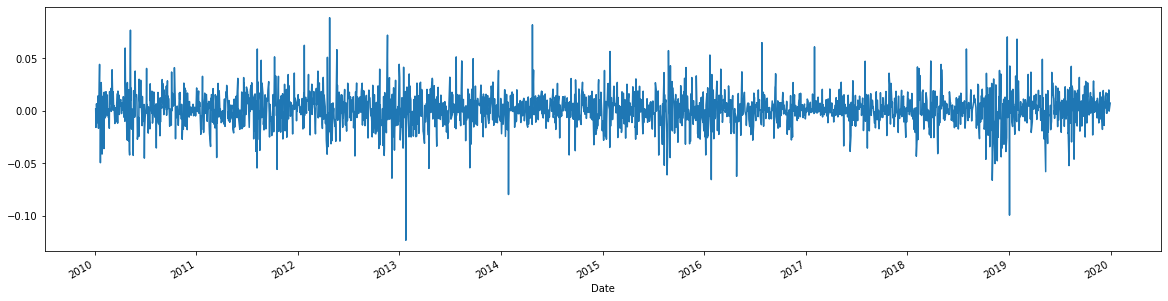

In [ ]:
#Close price percentage change 

(aapl
.pct_change()
.Close
.plot(figsize=(20,5))
)

<AxesSubplot:>

<AxesSubplot:>

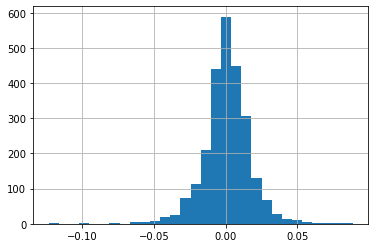

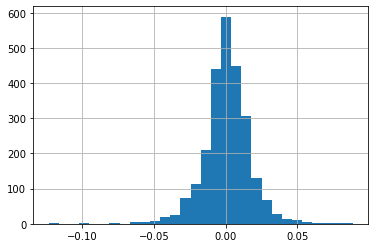

In [ ]:
#Historgram

(aapl
 .pct_change()
 .Close
 .hist(bins=30)
)

Date
2019-08-09   -0.011994
2019-08-12   -0.002537
2019-08-13    0.042348
2019-08-14   -0.029765
2019-08-15   -0.004981
                ...   
2019-12-24    0.000951
2019-12-26    0.019840
2019-12-27   -0.000379
2019-12-30    0.005935
2019-12-31    0.007307
Name: Close, Length: 100, dtype: float64

Date
2019-08-09   -0.011994
2019-08-12   -0.002537
2019-08-13    0.042348
2019-08-14   -0.029765
2019-08-15   -0.004981
                ...   
2019-12-24    0.000951
2019-12-26    0.019840
2019-12-27   -0.000379
2019-12-30    0.005935
2019-12-31    0.007307
Name: Close, Length: 100, dtype: float64

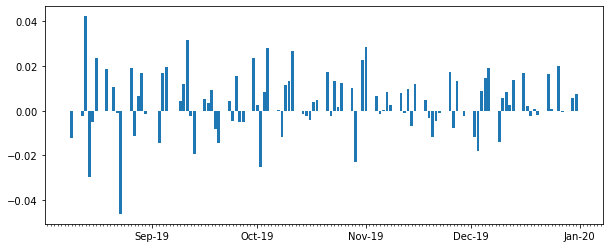

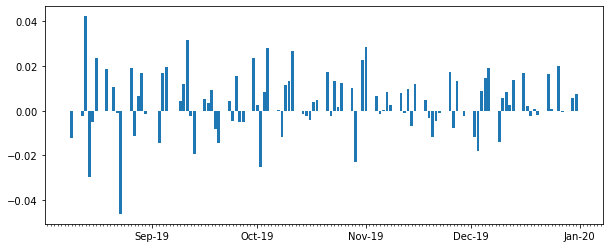

In [ ]:
#Need to write a function to organise the dates because pandas messes them up 
#Close price for last 100 rows

def my_bar(ser, ax):
    ax.bar(ser.index, ser)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return ser

fig, ax = plt.subplots(figsize=(10,4)) 
(aapl
    .pct_change()
    .Close
    .iloc[-100:]
    .pipe(my_bar, ax)
)

<AxesSubplot:xlabel='Date'>

<AxesSubplot:xlabel='Date'>

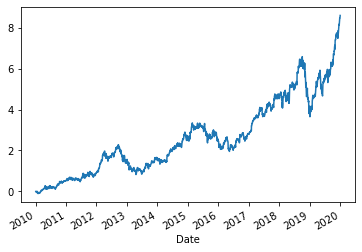

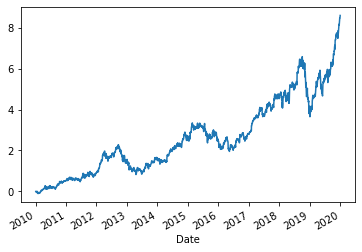

In [ ]:
def calc_cum_returns(df, col):
    ser = df[col]
    return(ser
          .sub(ser[0])
          .div(ser[0])
          )
(aapl
.pipe(calc_cum_returns, 'Close')
 .plot()
)

In [ ]:
def get_returns(df):
    return calc_cum_returns(df, 'Close')

get_returns(aapl)

Date
2010-01-04    0.000000
2010-01-05    0.001729
2010-01-06   -0.014205
2010-01-07   -0.016027
2010-01-08   -0.009486
                ...   
2019-12-24    8.298117
2019-12-26    8.482594
2019-12-27    8.478996
2019-12-30    8.535255
2019-12-31    8.604925
Name: Close, Length: 2516, dtype: float64

Date
2010-01-04    0.000000
2010-01-05    0.001729
2010-01-06   -0.014205
2010-01-07   -0.016027
2010-01-08   -0.009486
                ...   
2019-12-24    8.298117
2019-12-26    8.482594
2019-12-27    8.478996
2019-12-30    8.535255
2019-12-31    8.604925
Name: Close, Length: 2516, dtype: float64

In [ ]:
lambda df: get_returns(df)(aapl)

<function __main__.<lambda>(df)>

<function __main__.<lambda>(df)>

In [ ]:
(aapl
.assign(CumRet=lambda df: calc_cum_returns(df, 'Close'))
)

,Adj Close,Close,High,Low,Open,Volume,CumRet
Date,,,,,,,
2010-01-04,6.454505,7.643214,7.660714,7.585000,7.622500,493729600,0.000000
2010-01-05,6.465664,7.656429,7.699643,7.616071,7.664286,601904800,0.001729
2010-01-06,6.362820,7.534643,7.686786,7.526786,7.656429,552160000,-0.014205
2010-01-07,6.351056,7.520714,7.571429,7.466071,7.562500,477131200,-0.016027
2010-01-08,6.393280,7.570714,7.571429,7.466429,7.510714,447610800,-0.009486
...,...,...,...,...,...,...,...
2019-12-24,68.974495,71.067497,71.222504,70.730003,71.172501,48478800,8.298117
2019-12-26,70.342987,72.477501,72.495003,71.175003,71.205002,93121200,8.482594
2019-12-27,70.316277,72.449997,73.492500,72.029999,72.779999,146266000,8.478996


,Adj Close,Close,High,Low,Open,Volume,CumRet
Date,,,,,,,
2010-01-04,6.454505,7.643214,7.660714,7.585000,7.622500,493729600,0.000000
2010-01-05,6.465664,7.656429,7.699643,7.616071,7.664286,601904800,0.001729
2010-01-06,6.362820,7.534643,7.686786,7.526786,7.656429,552160000,-0.014205
2010-01-07,6.351056,7.520714,7.571429,7.466071,7.562500,477131200,-0.016027
2010-01-08,6.393280,7.570714,7.571429,7.466429,7.510714,447610800,-0.009486
...,...,...,...,...,...,...,...
2019-12-24,68.974495,71.067497,71.222504,70.730003,71.172501,48478800,8.298117
2019-12-26,70.342987,72.477501,72.495003,71.175003,71.205002,93121200,8.482594
2019-12-27,70.316277,72.449997,73.492500,72.029999,72.779999,146266000,8.478996
